# CS-401 Applied Data Analysis
## Notebook that summarizes import functions for the exam
**Name** : Vincent \
**Surname** : Roduit \
**School** : Ecole Polytechnique Fédérale de Lausanne \
**Year** : Master 1 - 2023


In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import networkx as nx
import warnings; warnings.simplefilter('ignore')

In [7]:
# random DataFrame as example
iris = sns.load_dataset('iris')
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data_folder = './Data/'

movies = pd.read_csv(data_folder+'blockbusters.csv')
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)


commune_pop = pd.read_excel(data_folder+'communes_pop.xls',skiprows=5,skipfooter=7,
                            sheet_name='2017',names=['commune','population_Jan',
                                                     'birth_alive','death','natrual_increase',
                                                     'arrivals','departure','migratory_balance',
                                                     'divergence_statistic','population_Dec','variation_num',
                                                     'variation_ratio'])

pop_per_commune = commune_pop[[name.startswith('......') for name in commune_pop.commune]].copy()

## LECTURE 3 Data Vizualization

### 3.1 Crosstab
 * practicle for heatmap

In [6]:
cross_tab  = pd.crosstab(movies['Main_Genre'],movies['studio'])

In [7]:
cross_tab.head()

studio,20th Century Fox,Columbia Pictures,DreamWorks,Embassy Pictures,IFC Films,Lionsgate Films,Metro-Goldwyn-Mayer,National Air and Space Museum,Newmarket Films,Paramount Pictures,Pixar,Sony Pictures,Sunn Classic Pictures,Universal Pictures,Walt Disney Pictures,Warner Bros
Main_Genre,,,,,,,,,,,,,,,,
Action,2,1,0,0,0,1,0,0,0,2,0,4,0,3,12,5
Adventure,1,3,0,0,0,1,1,0,0,4,0,0,0,0,0,3
Animation,2,0,0,0,0,0,0,0,0,4,5,0,0,6,4,1
Comedy,10,2,5,0,0,0,0,0,0,8,4,0,0,6,8,12
Crime,2,2,0,0,0,0,3,0,0,3,0,0,0,3,2,2


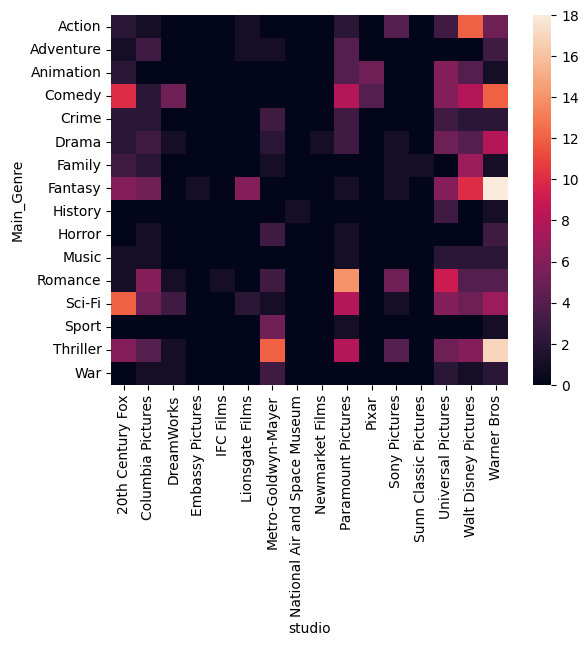

In [8]:
sns.heatmap(cross_tab);

### 3.2. Error bars

function plt.errorbar:
* yerr : specify the error
* marker : specify the type of marker
* markerfacecolor, markeredgecolor : color of the marker
* capsize : size of the end of errorbar

function plt.fillbetween:
* y1, y2 : two extreme value 
* ! Need to add the curve itself (plt.plot(...))


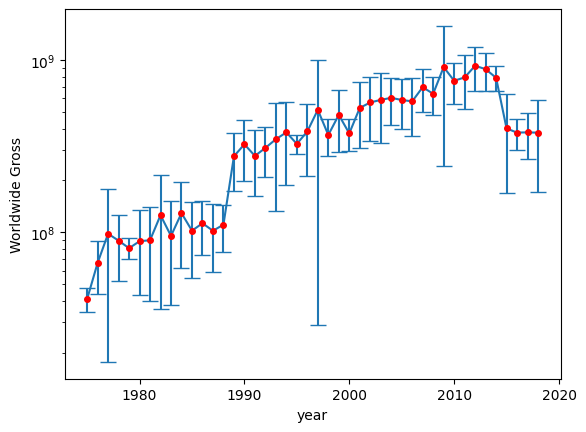

In [9]:
gross_per_year = movies.groupby('year')['worldwide_gross'].agg(['mean','std']).reset_index()

# Write your code to make plot with errorbars here
plt.errorbar(gross_per_year.year,
             gross_per_year['mean'],
             yerr=gross_per_year['std'],
             marker = 'o', 
             markersize='4', 
             markerfacecolor = 'r',
             markeredgecolor = 'r', 
             capsize=6)

plt.xlabel('year')
plt.ylabel('Worldwide Gross')
plt.semilogy()
plt.show()

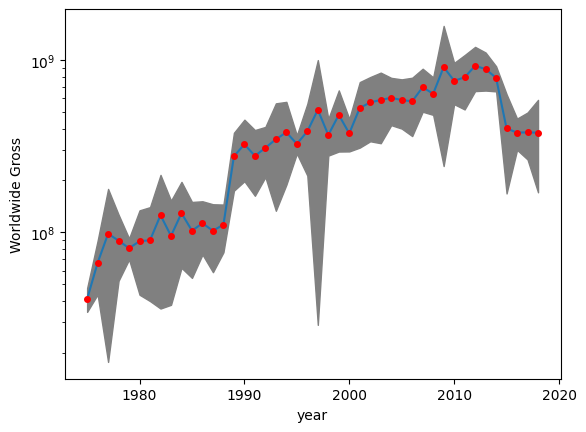

In [10]:
y1 = gross_per_year['mean'] - gross_per_year['std']
y2 = gross_per_year['mean'] + gross_per_year['std']
plt.xlabel('year')
plt.ylabel('Worldwide Gross')
plt.fill_between(gross_per_year.year, 
                 y1,
                 y2, 
                 color = 'gray')
plt.plot(gross_per_year.year,
         gross_per_year['mean'], 
         marker = 'o', 
         markersize='4', 
         markerfacecolor = 'r',
         markeredgecolor = 'r')
plt.semilogy()
plt.show()

### 3.3 Subplots

Text(0, 0.6, 'Number of movies')

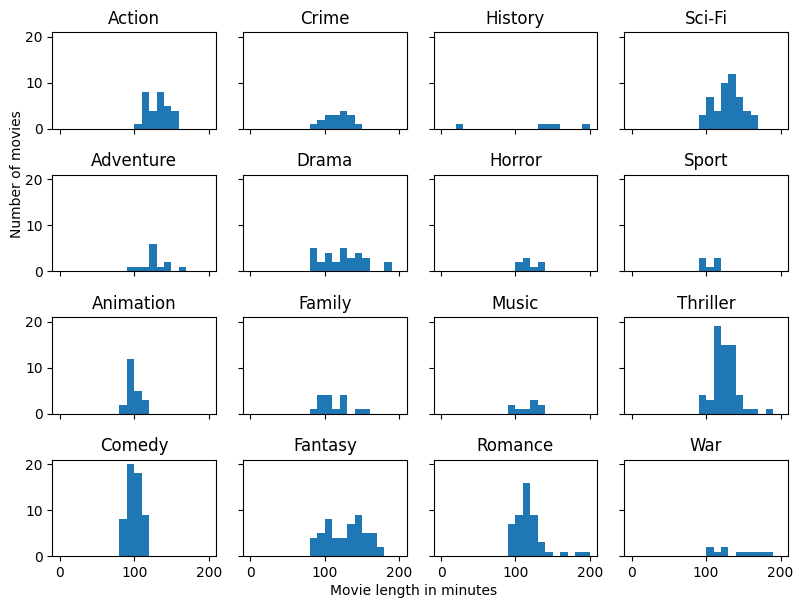

In [11]:
# Write your code to make 4x4 panel here
stats_by_genre = movies.groupby('Main_Genre').apply(lambda x: pd.Series({
        'length': x['length'].values
    }))

fig, ax = plt.subplots(4,4,figsize= (8,6), sharey = True, sharex = True)

for i in range(16):
    sbplt = ax[i%4, math.floor(i/4)]
    sbplt.hist(stats_by_genre.iloc[i].values,range = [0,200],bins = 20)
    sbplt.set_title(stats_by_genre.index[i])
    
fig.tight_layout()

fig.text(0.4,0, "Movie length in minutes")
fig.text(0,0.6, "Number of movies", rotation = 90)

### 3.4 histograms and CCDF

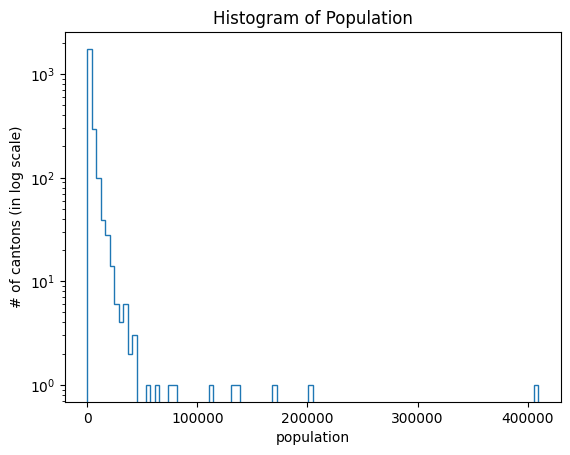

In [12]:
array_100 = plt.hist(pop_per_commune.population_Dec,bins=100,log=True,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

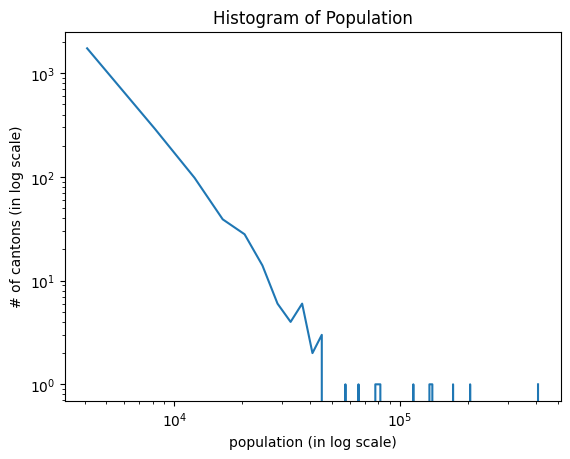

In [13]:
plt.loglog(array_100[1][1:],array_100[0])
plt.title('Histogram of Population')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

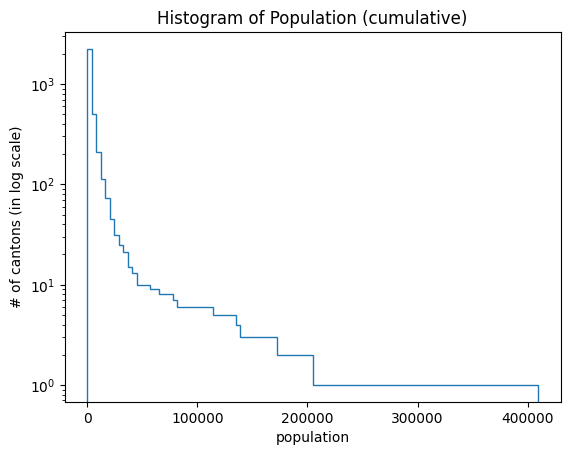

In [14]:
array_cumulative=plt.hist(pop_per_commune.population_Dec,bins=100,log=True,cumulative=-1,histtype='step')
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population')
plt.show()

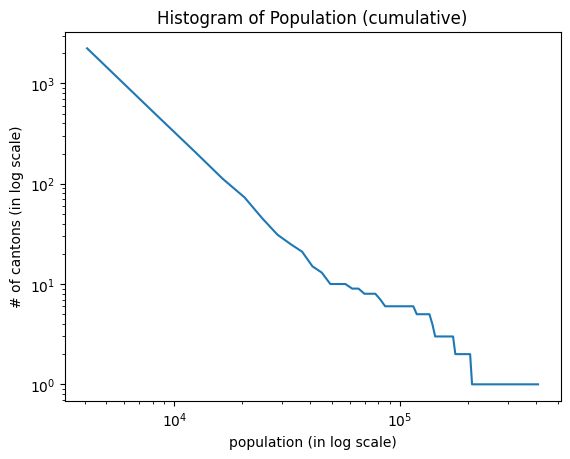

In [15]:
plt.loglog(array_cumulative[1][1:],array_cumulative[0])
plt.title('Histogram of Population (cumulative)')
plt.ylabel('# of cantons (in log scale)')
plt.xlabel('population (in log scale)')
plt.show()

## LECTURE 4: Describing Data

In [16]:
#usefull packages
from statsmodels.stats import diagnostic
from scipy import stats

### 4.1 Test distribution

In [17]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
diagnostic.kstest_normal(iris['sepal_length'].values, dist = 'norm')

(0.08865361377316228, 0.010290764353487069)

- p_value > 0.05 : cannot reject hypothesis H0 that the data comes from a normal distribution

In [19]:
diagnostic.kstest_normal(iris['sepal_length'].values, dist = 'exp')

(0.5223793388271812, 0.0009999999999998899)

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

### 4.2 Check correlation

In [20]:
stats.pearsonr(iris['sepal_length'],iris['petal_length'])

PearsonRResult(statistic=0.8717537758865831, pvalue=1.0386674194498827e-47)

- There is a strong (0.87) and significant (p < 0.05) positive correlation.

In [21]:
stats.spearmanr(iris['sepal_length'],iris['petal_length'])

SignificanceResult(statistic=0.881898126434986, pvalue=3.4430872780470036e-50)

- Spearman rank coorrelation is also significant.

### 4.3 Hypothesis testing

In [22]:
stats.ttest_ind(iris.query("species == 'setosa'")['sepal_width'],iris.query("species == 'virginica'")['sepal_width'])

TtestResult(statistic=6.45034908963073, pvalue=4.2463553818449584e-09, df=98.0)

- p < 0.05 : can reject the null hypothesis that the mean are the same

- if p > 0.05: cannot reject the null hypothesis that the mean are the same -> no significant difference

### 4.4 Measure uncertainty

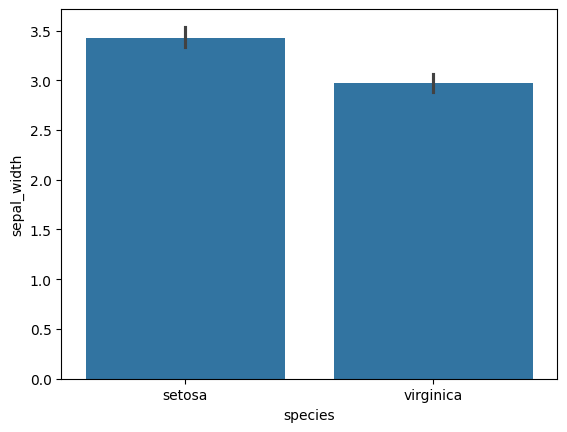

In [23]:
ax = sns.barplot(x="species", y="sepal_width", data=iris.loc[iris['species'].isin(['setosa','virginica'])])

No overlap -> there is a difference

### 4.5 Bootstrap confidence interval

In [24]:
def bootstrap_confidence_interval(data, iterations=1000):
    """
    Bootstrap the 95% confidence interval for the mean of the data.
    
    Parameters:
    - data: An array of data
    - iterations: The number of bootstrap samples to generate
    
    Returns:
    - A tuple representing the lower and upper bounds of the 95% confidence interval
    """
    means = np.zeros(iterations)
    
    for i in range(iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        means[i] = np.mean(bootstrap_sample)
        
    lower_bound = np.percentile(means, 2.5)
    upper_bound = np.percentile(means, 97.5)
    
    return (lower_bound, upper_bound)

## LECTURE 5: Regression for disentangling data

In [25]:
import statsmodels.formula.api as smf

In [26]:
df = pd.read_csv(data_folder + 'heart_failure_clinical_records_dataset.csv')

### 5.1 Linear regression

- Equations are specified using patsy formula syntax. Important operators are:
    1. `~` : Separates the left-hand side and right-hand side of a formula.
    2. `+` : Creates a union of terms that are included in the model.
    3. `:` : Interaction term.
    3. `*` : `a * b` is short-hand for `a + b + a:b`, and is useful for the common case of wanting to include all interactions between a set of variables.

In [27]:
mod = smf.ols(formula='time ~ C(high_blood_pressure) * C(DEATH_EVENT,  Treatment(reference=0)) + C(diabetes)',
              data=df)


res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     31.92
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           4.32e-22
Time:                        22:27:41   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3352.
Df Residuals:                     294   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### 5.2 Logistic regression

In [28]:
# how we standardize the countinuous variables

df['age'] = (df['age'] - df['age'].mean())/df['age'].std()
df['creatinine_phosphokinase'] = (df['creatinine_phosphokinase'] - df['creatinine_phosphokinase'].mean())/df['creatinine_phosphokinase'].std()
df['ejection_fraction'] = (df['ejection_fraction'] - df['ejection_fraction'].mean())/df['ejection_fraction'].std()
df['platelets'] = (df['platelets'] - df['platelets'].mean())/df['platelets'].std()
df['serum_creatinine'] = (df['serum_creatinine'] - df['serum_creatinine'].mean())/df['serum_creatinine'].std()
df['serum_sodium'] = (df['serum_sodium'] - df['serum_sodium'].mean())/df['serum_sodium'].std()

In [29]:
# logit is logistic regression. The other parameters are the same as before

mod = smf.logit(formula='DEATH_EVENT ~  age + creatinine_phosphokinase + ejection_fraction + \
                        platelets + serum_creatinine + serum_sodium + \
                        C(diabetes) + C(high_blood_pressure) +\
                        C(sex) + C(anaemia) + C(smoking) + C(high_blood_pressure)', data=df)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.492108
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                  0.2160
Time:                        22:27:41   Log-Likelihood:                -147.14
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.169e-13
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.1633      0.362     -3.214      0.001   

### 5.3 Obtain parameters

In [30]:
# feature names
variables = res.params.index

# quantifying uncertainty!

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

#confidence intervals
res.conf_int()

,0,1
Intercept,-1.872683,-0.453819
C(diabetes)[T.1],-0.431428,0.734243
C(high_blood_pressure)[T.1],-0.180976,1.018851
C(sex)[T.1],-1.086628,0.288599
C(anaemia)[T.1],-0.171894,1.007753
C(smoking)[T.1],-0.547629,0.818807
age,0.356256,0.968609
creatinine_phosphokinase,0.010320,0.553497
ejection_fraction,-1.177018,-0.487482
platelets,-0.379319,0.240561


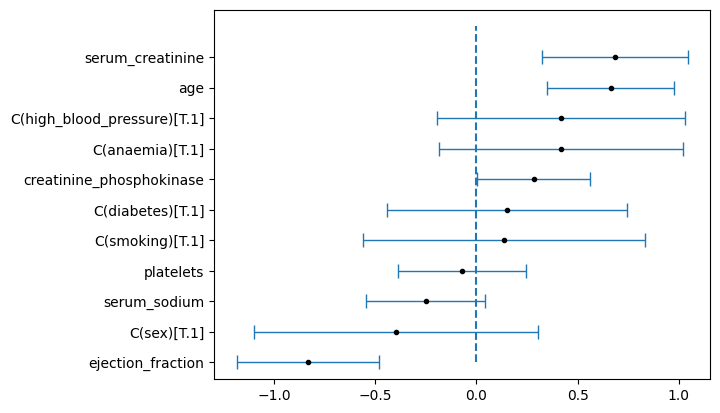

In [31]:
# sort them all by coefficients
l1, l2, l3, l4 = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:])))

# in this case, we index starting from the first element, not to plot the intercept

# we will use standard errors, instead of CIs
# two standard errors approximate the CIs (you can actually see in the summary table that
# +/2 SI is equivalent to the CIs)
# fancy plotting

plt.errorbar(l1, np.array(range(len(l1))), xerr= 2*np.array(l3), linewidth = 1,
             linestyle = 'none',marker = 'o',markersize= 3,
             markerfacecolor = 'black',markeredgecolor = 'black', capsize= 5)

plt.vlines(0,0, len(l1), linestyle = '--')

plt.yticks(range(len(l2)),l2);

### 5.4 Logarithmic outcomes

In multiplicative models, multiply the outcome by $e^{coeff}$ if feature = 1 (see last cell of Regression_analysis_solution.ipynb)

## LECTURE 6: Causal analysis of observational data

In [32]:
lalonde_data = pd.read_csv(data_folder + 'lalonde.csv')

### 6.1 Cool plot

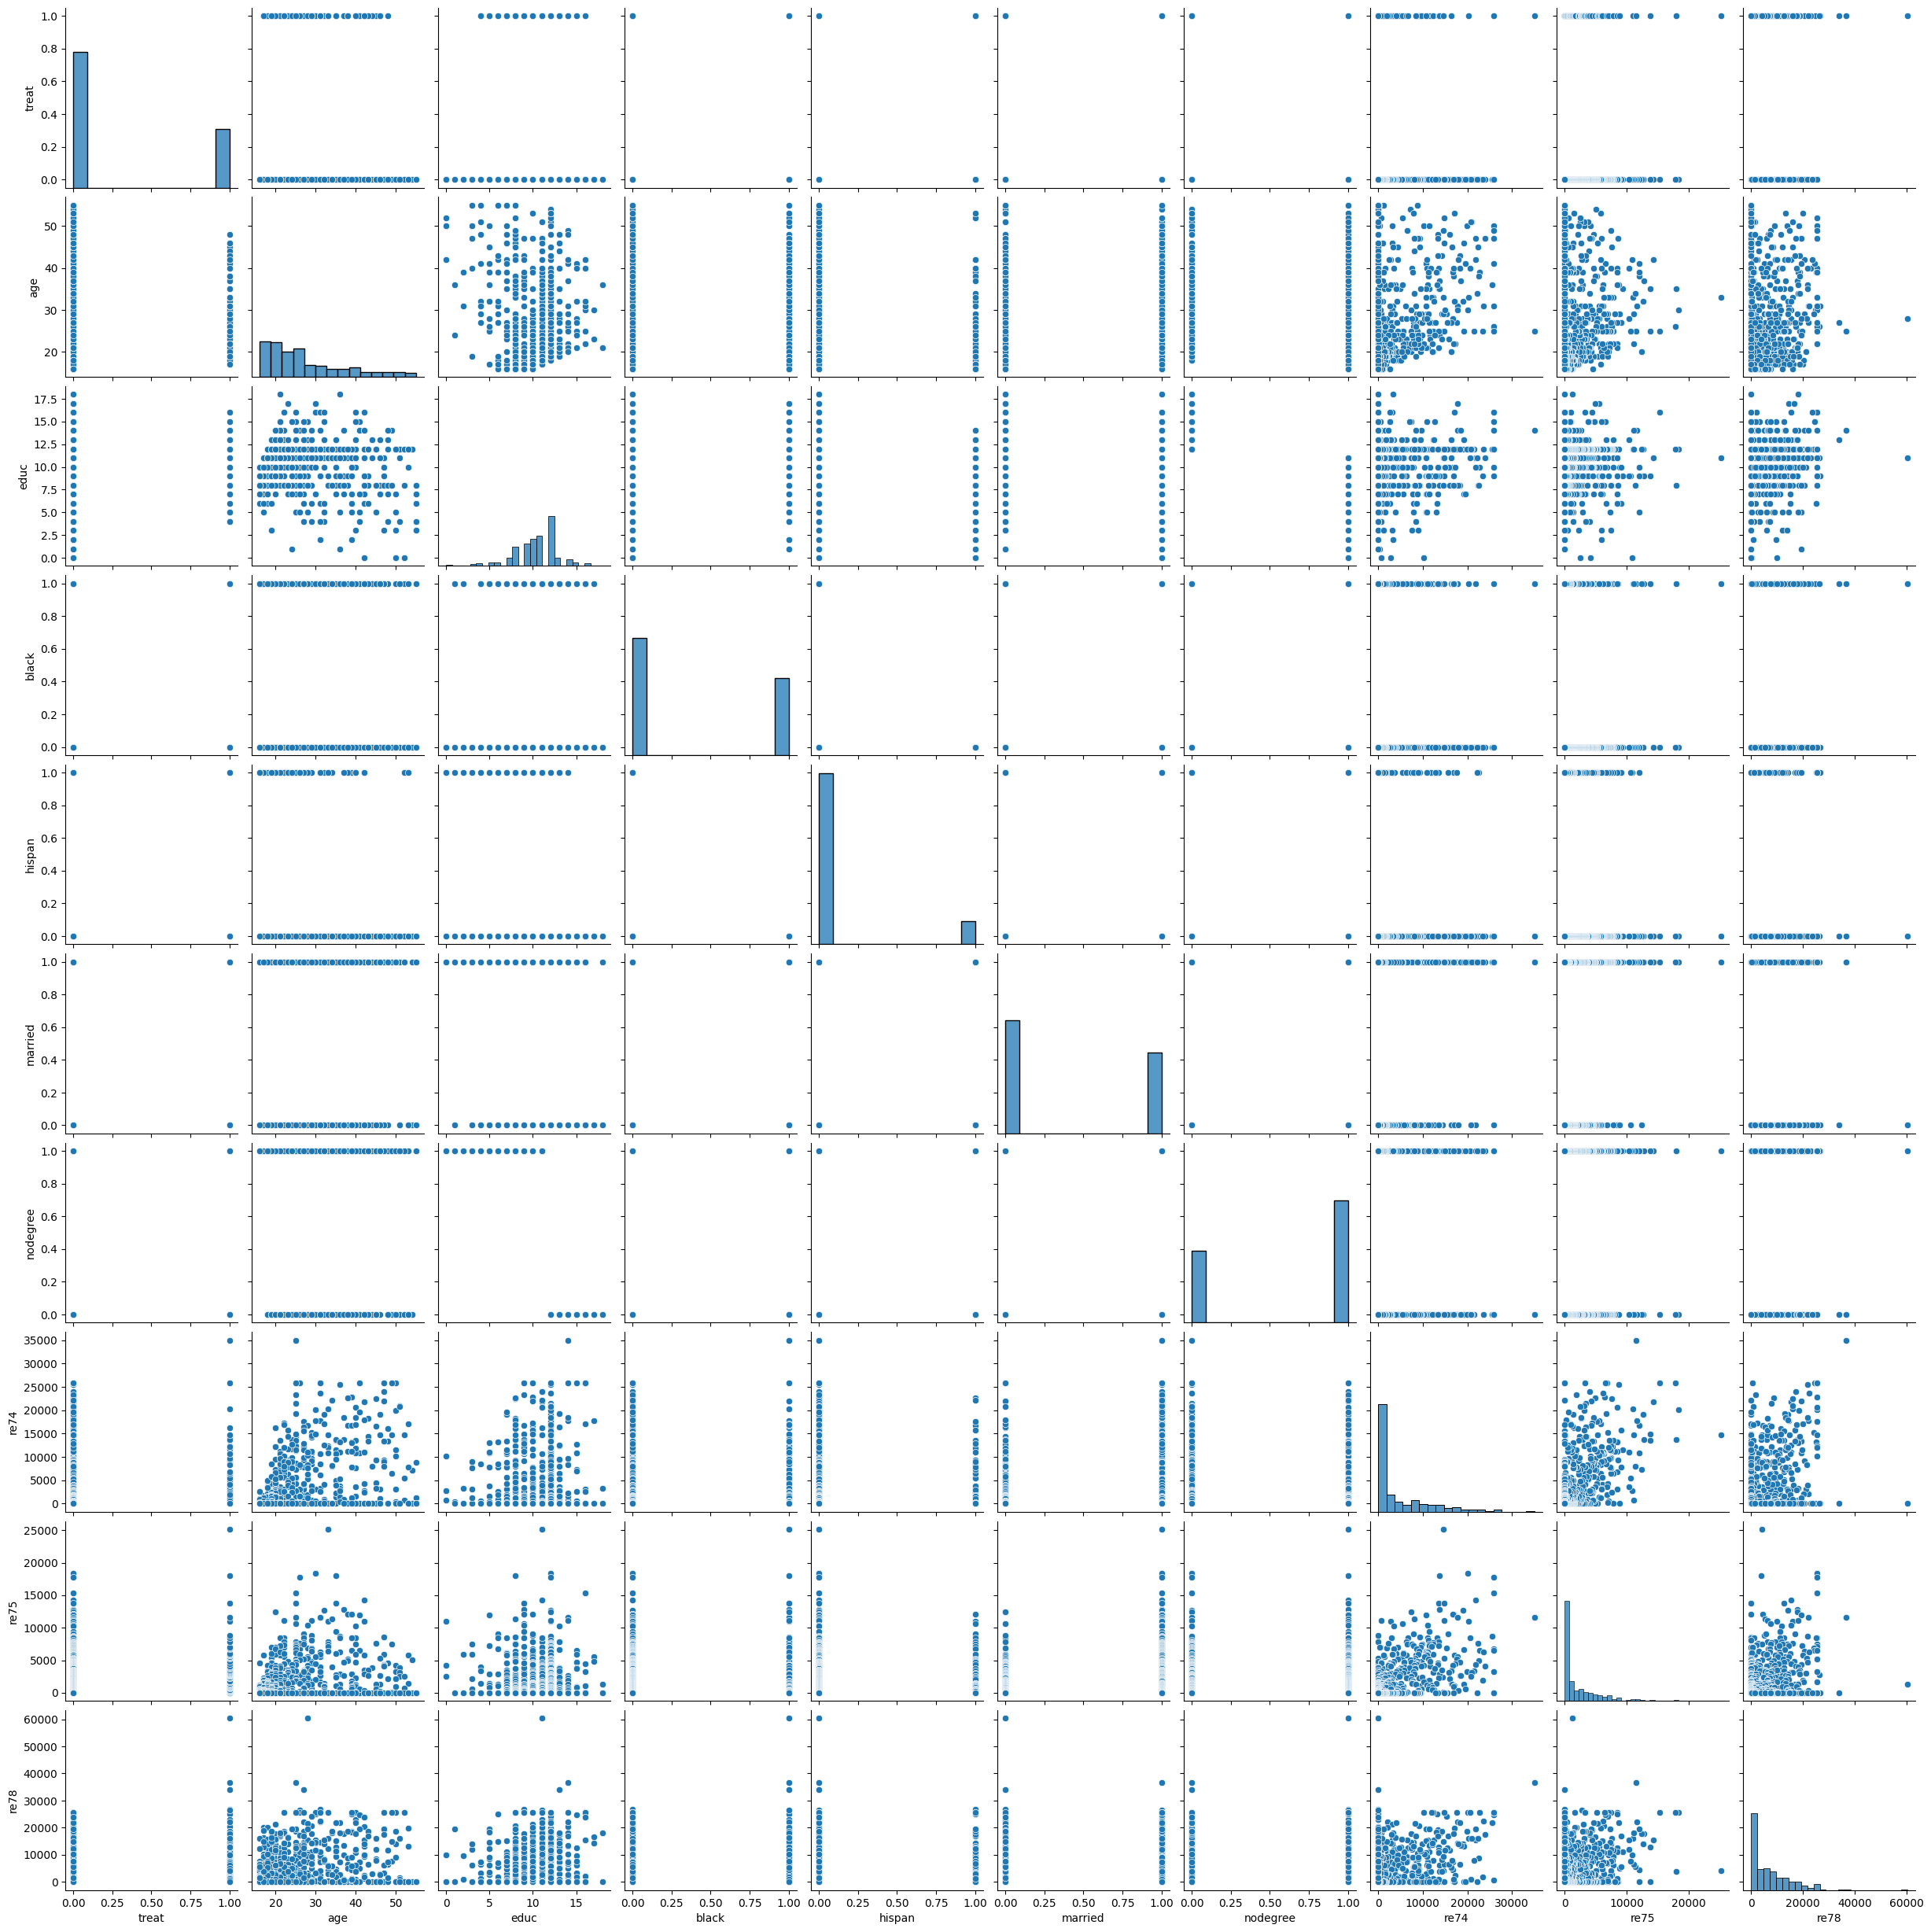

In [33]:
sns.pairplot(lalonde_data)

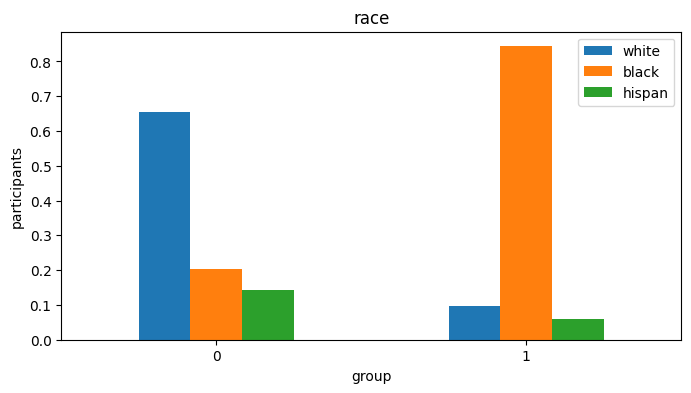

In [34]:
lalonde_data['white'] = (~(lalonde_data['black'].astype(bool) \
                    | lalonde_data['hispan'].astype(bool))).astype(bool)

lalonde_data_group = lalonde_data.groupby(lalonde_data.treat)[['white', 'black', 'hispan']].sum()
lalonde_data_group = lalonde_data_group.div(lalonde_data_group.sum(axis=1), axis=0)
pl = lalonde_data_group.plot(kind='bar', figsize=[8,4], rot=0)
pl.set_title('race')
pl.set_ylabel('participants')
pl.set_xlabel('group')
plt.show()

### 6.2 Propensity score

In [35]:
# let's standardize the continuous features
lalonde_data['age'] = (lalonde_data['age'] - lalonde_data['age'].mean())/lalonde_data['age'].std()
lalonde_data['educ'] = (lalonde_data['educ'] - lalonde_data['educ'].mean())/lalonde_data['educ'].std()
lalonde_data['re74'] = (lalonde_data['re74'] - lalonde_data['re74'].mean())/lalonde_data['re74'].std()
lalonde_data['re75'] = (lalonde_data['re75'] - lalonde_data['re75'].mean())/lalonde_data['re75'].std()

mod = smf.logit(formula='treat ~  age + educ + C(black) + C(hispan)  + C(married) + C(nodegree) + \
        +re74 + re75', data=lalonde_data)

res = mod.fit()

# Extract the estimated propensity scores
lalonde_data['Propensity_score'] = res.predict()

print(res.summary())

Optimization terminated successfully.
         Current function value: 0.397267
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  treat   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                  0.3508
Time:                        22:29:00   Log-Likelihood:                -243.92
converged:                       True   LL-Null:                       -375.75
Covariance Type:            nonrobust   LLR p-value:                 2.194e-52
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.8509      0.350     -8.147      0.000      -3.537      -2.165
C(black)[T.

### 6.3 Matching

In [36]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [40]:
# Separate the treatment and control groups
treatment_df = lalonde_data[lalonde_data['treat'] == 1]
control_df = lalonde_data[lalonde_data['treat'] == 0]

# Create an empty undirected graph
G = nx.Graph()

# Loop through all the pairs of instances
for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Calculate the similarity 
        similarity = get_similarity(control_row['Propensity_score'],
                                    treatment_row['Propensity_score'])

        # Add an edge between the two instances weighted by the similarity between them
        G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

# Generate and return the maximum weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [41]:
matched = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
balanced_df_all = lalonde_data.iloc[matched]

## LECTURE 7: Learning from data: supervised learning

### 7.1 Entropy

In [23]:
def entropy(N,P):
    """Compute the entropy of a binary variable.
    Args:
        N (int): Number of negative instances
        P (int): Number of positive instances
    Returns:
        float: Entropy
    """
    if P == 0 or N == 0:
        return 0
    return -P/(P+N) * math.log2(P/(P+N)) - N/(P+N) * math.log2(N/(P+N))

def total_entropy(values):
    """Compute the entropy of a list of binary variables.
    Args:
        values (list): List of tuples (N,P) with N negative instances and P positive instances
    Returns:
        float: Entropy
    """
    H = 0
    P = sum(value[0] for value in values)
    N = sum(value[1] for value in values)
    for value in values:
        H += (value[0] + value[1])/(P+N) * entropy(value[0],value[1])
    return H

def gain(S,values):
    """Compute the information gain of a split.
    Args:
        S (list): List of tuples (N,P) with N negative instances and P positive instances
        values (list): List of lists of tuples (N,P) with N negative instances and P positive instances
    Returns:
        float: Information gain
    """
    return entropy(S[0],S[1]) - total_entropy(values)

#example
values = [(2,3),(4,0),(3,2)]
print(total_entropy(values=values).__format__(".2f"))
print(gain(S=(9,5),values=values).__format__(".2f"))

0.69
0.25


### 7.2 Logistic regression

In [30]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve

In [24]:
titanic = pd.read_excel('data/titanic.xls')

In [33]:
titanic_features = ['sex', 'age', 'sibsp', 'parch', 'fare']
# The features vector
X = pd.get_dummies(titanic[titanic_features])
X = X.fillna(X.mean())
y = titanic['survived']

In [34]:
logistic = LogisticRegression(solver='lbfgs')

In [35]:
precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")
recall = cross_val_score(logistic, X, y, cv=10, scoring="recall")

# Precision: avoid false positives
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
# Recall: avoid false negatives
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))

Precision: 0.72 (+/- 0.13)
Recall: 0.68 (+/- 0.16)


### 7.3 Roc curve

In [36]:
# Predict the probabilities with a cross validationn
y_pred = cross_val_predict(logistic, X, y, cv=10, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y, y_pred[:, 1])
# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr)

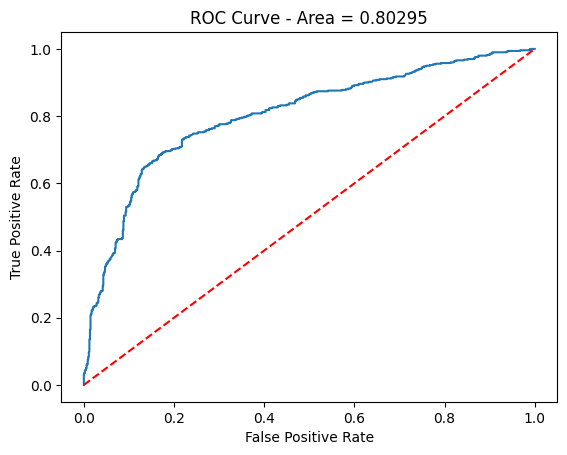

In [37]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Area = {:.5f}".format(auc_score));

## LECTURE 8: Learning from data: applied machine learnin

### 8.1 Performance metrics

In [ ]:
def precision(TP,FP):
    """Compute the precision of a binary classifier.
    Args:
        TP (int): Number of true positives
        FP (int): Number of false positives
    Returns:
        float: Precision
    """
    return TP/(TP+FP)
def recall(TP,FN):
    """Compute the recall of a binary classifier.
    Args:
        TP (int): Number of true positives
        FN (int): Number of false negatives
    Returns:
        float: Recall
    """
    return TP/(TP+FN)
def f1_score(TP,FP,FN):
    """Compute the F1 score of a binary classifier.
    Args:
        TP (int): Number of true positives
        FP (int): Number of false positives
        FN (int): Number of false negatives
    Returns:
        float: F1 score
    """
    return 2*precision(TP,FP)*recall(TP,FN)/(precision(TP,FP)+recall(TP,FN))

## Lecture 9: Learning from data: Unsupervised learning

In [117]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import random
from sklearn.datasets import make_blobs, make_moons

In [118]:
random.seed(42)
top_secret_number = random.randint(2, 10)
total_samples = 100

# This create some artifical clusters with standard dev. = 2
X, _, centers = make_blobs(n_samples=total_samples, 
                           centers=top_secret_number, 
                           cluster_std=2,
                           n_features=2,
                           return_centers=True, 
                           random_state=42)

X[:3]

array([[-8.57321463, -9.90980404],
       [ 6.26691327, -0.48855895],
       [-3.44814639, 10.09940622]])

### 9.1 Silhouette

Text(0, 0.5, 'Silhouette score')

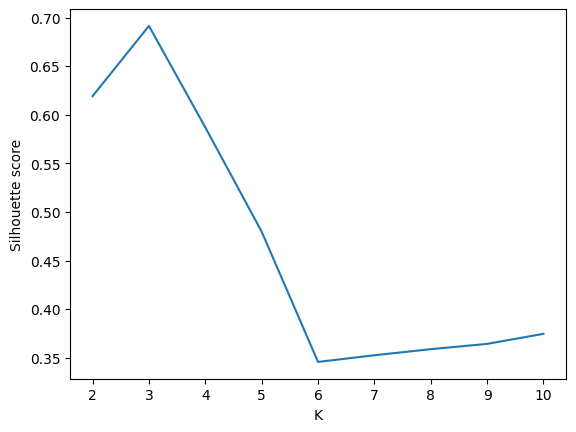

In [119]:
silhouettes = []

# Try multiple k
for k in range(2, 11):
    # Cluster the data and assigne the labels
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(X)
    # Get the Silhouette score
    score = silhouette_score(X, labels)
    silhouettes.append({"k": k, "score": score})
    
# Convert to dataframe
silhouettes = pd.DataFrame(silhouettes)

# Plot the data
plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("K")
plt.ylabel("Silhouette score")

### 9.2 Elbow method

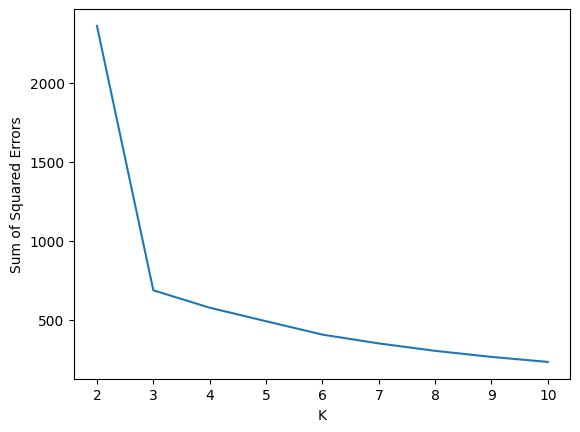

In [120]:
def plot_sse(features_X, start=2, end=11):
    sse = []
    for k in range(start, end):
        # Assign the labels to the clusters
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})

    sse = pd.DataFrame(sse)
    # Plot the data
    plt.plot(sse.k, sse.sse)
    plt.xlabel("K")
    plt.ylabel("Sum of Squared Errors")
    
plot_sse(X)

## Lecture 10-11: Handling text data

In [3]:
import spacy
import os, codecs

In [2]:
nlp = spacy.load('en_core_web_sm')

In [71]:
with codecs.open(os.path.join(data_folder,'books/Frankenstein.txt'),encoding="utf8") as f:
    book = f.read()

### 10.1 remove new lines

In [51]:
book = book.replace("\n", " ")

In [52]:
print(book[:300])

Frankenstein,  or the Modern Prometheus   by  Mary Wollstonecraft (Godwin) Shelley     Letter 1   St. Petersburgh, Dec. 11th, 17--  TO Mrs. Saville, England  You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings


### 10.2 start NLP

In [53]:
doc = nlp(book)

### 10.3 Sentence splitting

In [54]:
sentences = [sent for sent in doc.sents]

### 10.4 Tokenization

In [55]:
example = 'I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight.'

doc = nlp(example)

#strings are encoded to hashes
tokens = [token.text for token in doc]

print(example,'\n')
print(tokens)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

['I', 'am', 'already', 'far', 'north', 'of', 'London', ',', 'and', 'as', 'I', 'walk', 'in', 'the', 'streets', 'of', 'Petersburgh', ',', 'I', 'feel', 'a', 'cold', 'northern', 'breeze', 'play', 'upon', 'my', 'cheeks', ',', 'which', 'braces', 'my', 'nerves', 'and', 'fills', 'me', 'with', 'delight', '.']


### 10.5 Part of speech tagging

In [56]:
pos_tagged = [(token.text, token.pos_) for token in doc]

print(example,'\n')
print(pos_tagged)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

[('I', 'PRON'), ('am', 'AUX'), ('already', 'ADV'), ('far', 'ADV'), ('north', 'ADV'), ('of', 'ADP'), ('London', 'PROPN'), (',', 'PUNCT'), ('and', 'CCONJ'), ('as', 'SCONJ'), ('I', 'PRON'), ('walk', 'VERB'), ('in', 'ADP'), ('the', 'DET'), ('streets', 'NOUN'), ('of', 'ADP'), ('Petersburgh', 'PROPN'), (',', 'PUNCT'), ('I', 'PRON'), ('feel', 'VERB'), ('a', 'DET'), ('cold', 'ADJ'), ('northern', 'ADJ'), ('breeze', 'NOUN'), ('play', 'VERB'), ('upon', 'SCONJ'), ('my', 'PRON'), ('cheeks', 'NOUN'), (',', 'PUNCT'), ('which', 'PRON'), ('braces', 'VERB'), ('my', 'PRON'), ('nerves', 'NOUN'), ('and', 'CCONJ'), ('fills', 'VERB'), ('me', 'PRON'), ('with', 'ADP'), ('delight', 'NOUN'), ('.', 'PUNCT')]


### 10.6 Named entity recognition

In [57]:
print(example,'\n')
for ent in doc.ents:
    print(ent.text, ent.label_)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

London GPE
Petersburgh GPE


### 10.7 remove stopwords

In [58]:
stop_words = [token.text for token in doc if token.is_stop]

In [59]:
print(stop_words)

['I', 'am', 'already', 'of', 'and', 'as', 'I', 'in', 'the', 'of', 'I', 'a', 'upon', 'my', 'which', 'my', 'and', 'me', 'with']


In [63]:
words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]

In [65]:
print(words)

['far', 'north', 'London', 'walk', 'streets', 'Petersburgh', 'feel', 'cold', 'northern', 'breeze', 'play', 'cheeks', 'braces', 'nerves', 'fills', 'delight']


### 10.8 Lemmatization

In [60]:
print(example,'\n')
for token in doc:
    if token.text != token.lemma_:
        print(token.text,'--->',token.lemma_)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

am ---> be
streets ---> street
cheeks ---> cheek
braces ---> brace
nerves ---> nerve
fills ---> fill
me ---> I


### 10.9 Dependancy parsing

In [61]:
print(example,'\n')

for token in doc:
    print('Token:',token.text,'Head:',token.head.text, 'Children:',[child for child in token.children])

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

Token: I Head: am Children: []
Token: am Head: am Children: [I, already, north, ,, and, feel]
Token: already Head: am Children: []
Token: far Head: north Children: []
Token: north Head: am Children: [far, of]
Token: of Head: north Children: [London]
Token: London Head: of Children: []
Token: , Head: am Children: []
Token: and Head: am Children: []
Token: as Head: walk Children: []
Token: I Head: walk Children: []
Token: walk Head: feel Children: [as, I, in]
Token: in Head: walk Children: [streets]
Token: the Head: streets Children: []
Token: streets Head: in Children: [the, of]
Token: of Head: streets Children: [Petersburgh]
Token: Petersburgh Head: of Children: []
Token: , Head: feel Children: []
Token: I Head: feel Children: []
Token: feel Head: am Children: [walk, ,, I, play, .]
Token: a Head: play Child

### 10.10 Counting work occurence

In [62]:
from collections import Counter

print(example,'\n')
words = [token.text for token in doc]

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common()

print(common_words)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

[('I', 3), (',', 3), ('of', 2), ('and', 2), ('my', 2), ('am', 1), ('already', 1), ('far', 1), ('north', 1), ('London', 1), ('as', 1), ('walk', 1), ('in', 1), ('the', 1), ('streets', 1), ('Petersburgh', 1), ('feel', 1), ('a', 1), ('cold', 1), ('northern', 1), ('breeze', 1), ('play', 1), ('upon', 1), ('cheeks', 1), ('which', 1), ('braces', 1), ('nerves', 1), ('fills', 1), ('me', 1), ('with', 1), ('delight', 1), ('.', 1)]


### 10.10 Sentiment Analysis

In [67]:
#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [68]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(example)

In [69]:
print(example, '\n')
print('Negative sentiment:',vs['neg'])
print('Neutral sentiment:',vs['neu'])
print('Positive sentiment:',vs['pos'])
print('Compound sentiment:',vs['compound'])

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

Negative sentiment: 0.035
Neutral sentiment: 0.806
Positive sentiment: 0.159
Compound sentiment: 0.7096


### 10.11 Document classification

In [72]:
corpus_root = 'Data/books'
# Let's load our corpus via NLTK this time
from nltk.corpus import PlaintextCorpusReader
our_books = PlaintextCorpusReader(corpus_root, '.*.txt')
print(our_books.fileids())

['DRACULA.txt', 'Frankenstein.txt', 'Moby_Dick.txt', 'PRIDE_AND_PREJUDICE.txt']


#### Segment books into chunck

In [73]:
def get_chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]


# Get the data
book_id = {f:n for n,f in enumerate(our_books.fileids())} # dictionary of books

chunks = list()
chunk_class = list() # this list contains the original book of the chunk, for evaluation

limit = 500 # how many chunks total
size = 50 # how many sentences per chunk/page

for f in our_books.fileids():
    sentences = our_books.sents(f)
    print(f,":")
    print('Number of sentences:',len(sentences))
    
    # create chunks
    chunks_of_sents = [x for x in get_chunks(sentences,size)] # this is a list of lists of sentences, which are a list of tokens
    chs = list()
    
    # regroup so to have a list of chunks which are strings
    for c in chunks_of_sents:
        grouped_chunk = list()
        for s in c:
            grouped_chunk.extend(s)
        chs.append(" ".join(grouped_chunk))
    print("Number of chunks:",len(chs),'\n')
    
    # filter to the limit, to have the same number of chunks per book
    chunks.extend(chs[:limit])
    chunk_class.extend([book_id[f] for _ in range(len(chs[:limit]))])

DRACULA.txt :
Number of sentences: 9303
Number of chunks: 187 

Frankenstein.txt :
Number of sentences: 3378
Number of chunks: 68 

Moby_Dick.txt :
Number of sentences: 9609
Number of chunks: 193 

PRIDE_AND_PREJUDICE.txt :
Number of sentences: 6055
Number of chunks: 122 



In [76]:
print(chunks[0])

DRACULA Bram Stoker CHAPTER I JONATHAN HARKER ' S JOURNAL ( _Kept in shorthand . _ ) _3 May . Bistritz . _ -- Left Munich at 8 : 35 P . M ., on 1st May , arriving at Vienna early next morning ; should have arrived at 6 : 46 , but train was an hour late . Buda - Pesth seems a wonderful place , from the glimpse which I got of it from the train and the little I could walk through the streets . I feared to go very far from the station , as we had arrived late and would start as near the correct time as possible . The impression I had was that we were leaving the West and entering the East ; the most western of splendid bridges over the Danube , which is here of noble width and depth , took us among the traditions of Turkish rule . We left in pretty good time , and came after nightfall to Klausenburgh . Here I stopped for the night at the Hotel Royale . I had for dinner , or rather supper , a chicken done up some way with red pepper , which was very good but thirsty . ( _Mem . _ , get recip

### 10.12 Bag of words

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from numpy.random import shuffle as random_shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [88]:
vectorizer = CountVectorizer()

#initialize and specify minumum number of occurences to avoid untractable number of features
#vectorizer = CountVectorizer(min_df = 2) if we want high frequency

#create bag of words features
X = vectorizer.fit_transform(chunks)

print('Number of samples:',X.toarray().shape[0])
print('Number of features:',X.toarray().shape[1])

#mask and convert to int Frankenstein
Y = np.array(chunk_class) == 1
Y = Y.astype(int)  

#shuffle the data
X, Y = shuffle(X, Y, random_state=0)

#split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Number of samples: 570
Number of features: 23116


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [103]:
accs = []

#the grid of regularization parameter 
grid = [0.01,0.1,1,10,100,1000,10000]

for c in grid:
    
    #initialize the classifier
    clf = LogisticRegression(random_state=0, solver='lbfgs',C = c)
    
    #crossvalidate
    scores = cross_val_score(clf, X_train,Y_train, cv=10)
    accs.append(np.mean(scores))

In [104]:
clf = LogisticRegression(random_state=0, solver='lbfgs',C = 10).fit(X_train,Y_train)

#predict on the test set
print('Accuracy:',clf.score(X_test,Y_test))

Accuracy: 0.9824561403508771


#### get the coeff

In [107]:
coefs=clf.coef_[0]
top_three = np.argpartition(coefs, -20)[-20:]

print(np.array(vectorizer.get_feature_names_out())[top_three])

['frankenstein' 'towards' 'death' 'poor' 'creature' 'father' 'had' 'me'
 'my' 'will' 'this' 'but' 'by' 'and' 'of' 'which' 'justine' 'yet' 'misery'
 'who']
